# 

In [2]:
import pandas as pd


In [3]:
df = pd.read_csv('Titanic-Dataset.csv')

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


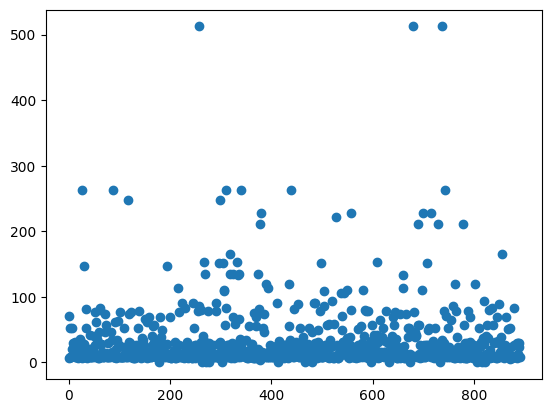

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df.index,  df['Fare'])





plt.show()

In [9]:
import seaborn as sns
mean_price = df['Fare'].mean()
std_price = df['Fare'].std()


threshold = 3


upper_limit = mean_price + threshold * std_price
lower_limit = mean_price - threshold * std_price


df_cleaned = df[(df['Fare'] >= lower_limit) & (df['Fare'] <= upper_limit)]


df_cleaned.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


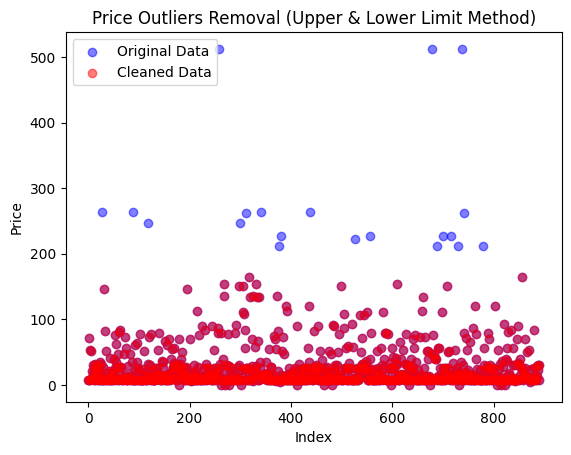

In [10]:
plt.scatter(df.index, df['Fare'], color='blue', label='Original Data', alpha=0.5)


plt.scatter(df_cleaned.index, df_cleaned['Fare'], color='red', label='Cleaned Data', alpha=0.5)


plt.title('Price Outliers Removal (Upper & Lower Limit Method)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()

plt.show()

In [11]:
median_price=df_cleaned['Age'].median()
df_cleaned['Age'].fillna(median_price, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8780\2491576574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age'].fillna(median_price, inplace=True)


In [12]:
df_cleaned.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          684
Embarked         2
dtype: int64

In [13]:
df_cleaned.shape

(871, 12)

In [14]:
df_cleaned.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          684
Embarked         2
dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8780\501734698.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age_group'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=False)


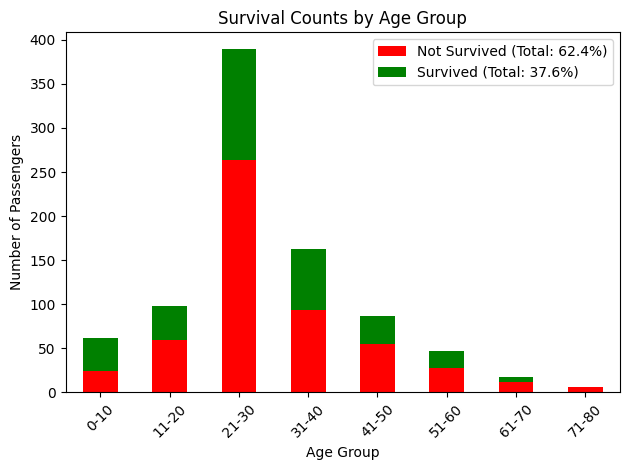

In [15]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']


df_cleaned['Age_group'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=False)


age_survival_counts = df_cleaned.groupby(['Age_group', 'Survived']).size().unstack(fill_value=0)


total_counts = age_survival_counts.sum()
total_survived = total_counts[1]
total_not_survived = total_counts[0]
total_passengers = total_counts.sum()

percent_survived = (total_survived / total_passengers) * 100
percent_not_survived = (total_not_survived / total_passengers) * 100


ax = age_survival_counts.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival Counts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)


plt.legend(['Not Survived (Total: {:.1f}%)'.format(percent_not_survived),
            'Survived (Total: {:.1f}%)'.format(percent_survived)])

plt.tight_layout()
plt.show()

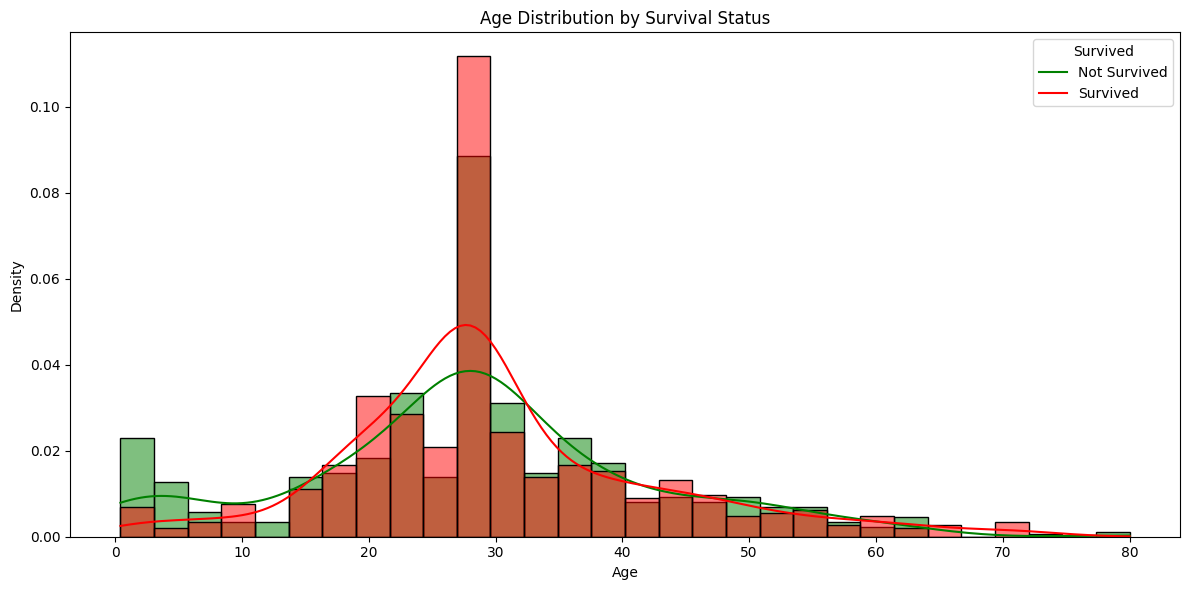

In [16]:
plt.figure(figsize=(12, 6))


sns.histplot(data=df_cleaned, x='Age', hue='Survived', bins=30, kde=True, stat='density', common_norm=False,
             palette={0: 'red', 1: 'green'}, alpha=0.5)

plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])


plt.tight_layout()
plt.show()

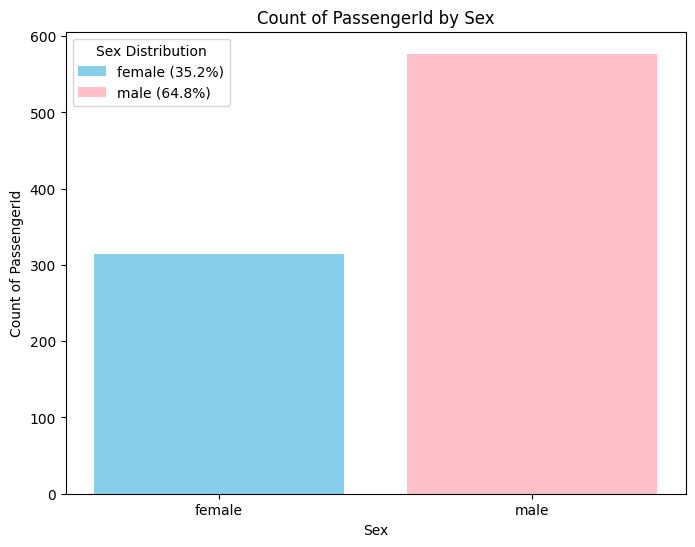

In [17]:
sex_counts = df.groupby('Sex')['PassengerId'].count()


total = sex_counts.sum()
percentages = (sex_counts / total) * 100
plt.figure(figsize=(8, 6))
bars = plt.bar(sex_counts.index, sex_counts.values, color=['skyblue', 'pink'])


legend_labels = [f"{sex} ({percent:.1f}%)" for sex, percent in zip(sex_counts.index, percentages)]
plt.legend(bars, legend_labels, title="Sex Distribution")

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Count of PassengerId')
plt.title('Count of PassengerId by Sex')
plt.xticks(sex_counts.index) 
plt.show()

In [18]:
df_cleaned.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,445.319173,0.376579,2.338691,29.327405,0.517796,0.366246,26.530170
std,257.761917,0.484806,0.821469,13.041148,1.101448,0.792325,29.351184
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,221.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.862500
75%,665.500000,1.000000,3.000000,35.000000,1.000000,0.000000,30.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,164.866700


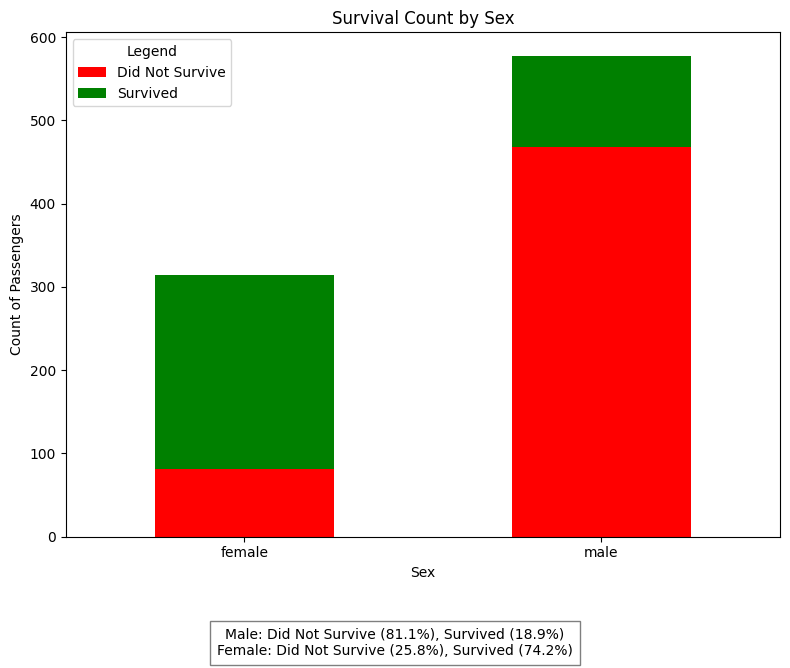

In [19]:
survival_counts = df.groupby(['Sex', 'Survived'])['PassengerId'].count().unstack()


percentages = survival_counts.div(survival_counts.sum(axis=1), axis=0) * 100


legend_labels = [
    f"Male: Did Not Survive ({percentages.loc['male', 0]:.1f}%), Survived ({percentages.loc['male', 1]:.1f}%)",
    f"Female: Did Not Survive ({percentages.loc['female', 0]:.1f}%), Survived ({percentages.loc['female', 1]:.1f}%)"
]


survival_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['red', 'green'])

#
plt.xlabel('Sex')
plt.ylabel('Count of Passengers')
plt.title('Survival Count by Sex')
plt.legend(['Did Not Survive', 'Survived'], title="Legend")
plt.xticks(rotation=0) 

plt.figtext(0.5, -0.1, '\n'.join(legend_labels), ha='center', fontsize=10, bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})

plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8780\1385523530.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(data=df_cleaned, x='Pclass', palette='pastel')


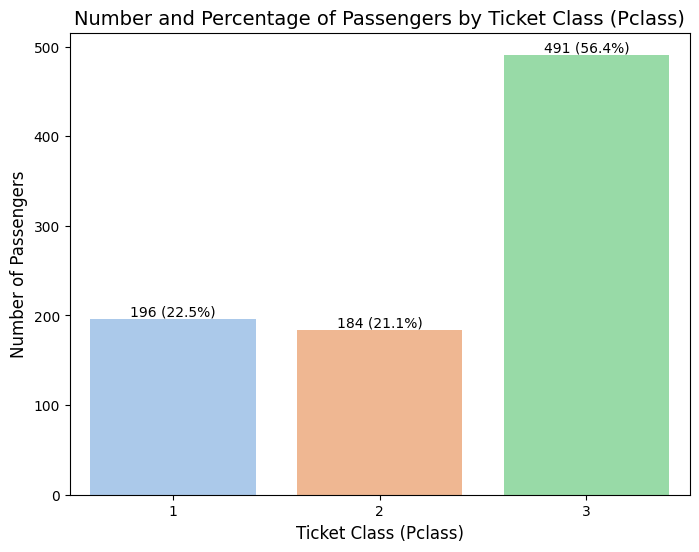

In [32]:
pclass_counts = df_cleaned['Pclass'].value_counts().sort_index()  
pclass_percentages = (pclass_counts / len(df_cleaned)) * 100


plt.figure(figsize=(8, 6))
bars = sns.countplot(data=df_cleaned, x='Pclass', palette='pastel')


for bar, count, percentage in zip(bars.patches, pclass_counts, pclass_percentages):
    bar_height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar_height, 
        f'{count} ({percentage:.1f}%)', 
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color='black'
    )


plt.title('Number and Percentage of Passengers by Ticket Class (Pclass)', fontsize=14)
plt.xlabel('Ticket Class (Pclass)', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks(fontsize=10)
plt.show()

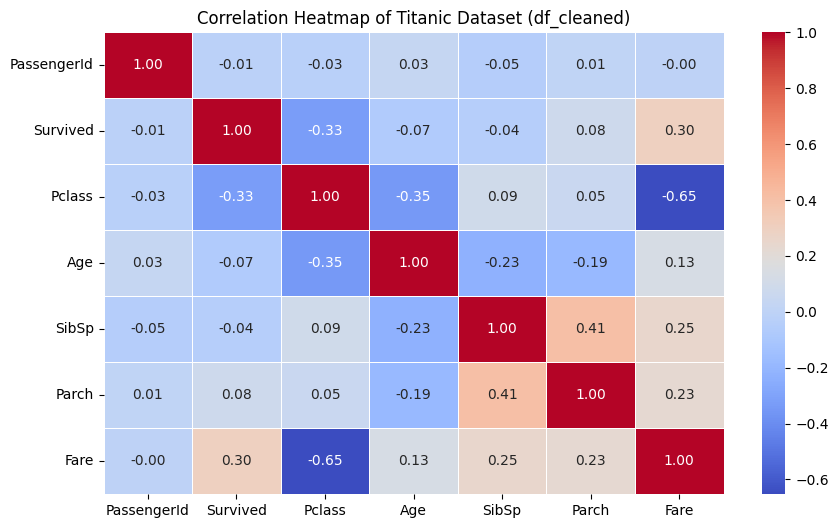

In [21]:
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64'])


correlation_matrix = numerical_columns.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Dataset (df_cleaned)')
plt.show()

#### 1. There were total 871 Passangers.
#### 2. 64.8% Passangers were Males and 35.2% were Females.
#### 3. Majority of the passangers were in between the age group of 20-30.
#### 4. Only 18.9% Males and 74.2% Females survived.
#### 5. 22.5% Bought a first class ticket, 21.1% Bought 2nd class and 56.4% bought 3rd class ticket